# KNN Classifier

데이터

In [677]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3,
                11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7,
                10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

데이터 가공

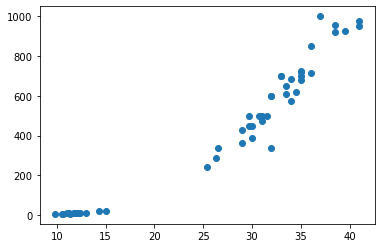

In [678]:
import pandas as pd
length = pd.DataFrame(bream_length + smelt_length)
weight = pd.DataFrame(bream_weight + smelt_weight)

import matplotlib.pyplot as plt

plt.scatter(length, weight)
plt.show()

In [679]:
import numpy as np

fish_data = pd.concat([length, weight], axis=1)
fish_data = np.array(fish_data)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(fish_data)
fish_data = ss.transform(fish_data)

fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target = np.array(fish_target)


정답(target)  
1 : bream  
2 : smelt

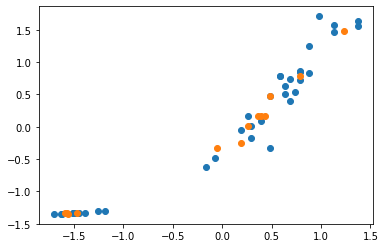

In [680]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target)

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.show()

KNN 사용

1.0
1.0
[1.]


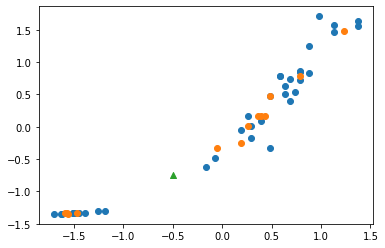

In [681]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
print(kn.score(train_input, train_target))
print(kn.score(test_input, test_target))

new = np.array([[22, 200]])
new = ss.transform(new)
print(kn.predict(new))

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.scatter(new[:,0], new[:,1], marker='^')
plt.show()


# KNN Regressor

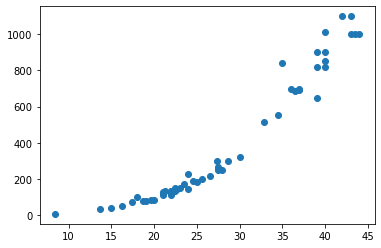

In [682]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
                         21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
                         23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
                         27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
                         39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
                         44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
                         115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                         150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
                         218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
                         556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
                         850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
                         1000.0])

plt.scatter(perch_length, perch_weight)
plt.show()

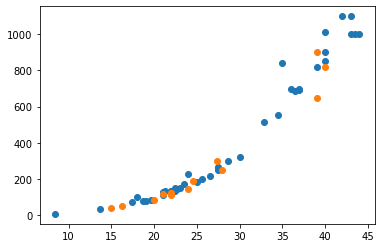

In [683]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight)

plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.show()


0.984332891526819
0.9420709746954479


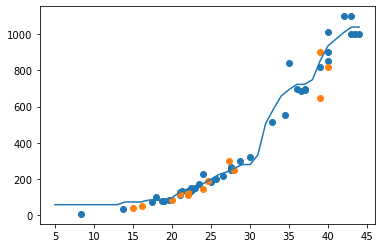

In [684]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

list = []
for i in range(5, 45):
    list.append(knr.predict([[i]]))

plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.plot(range(5,45), list)
plt.show()

# 1차 LineRegressor

0.9193418653411279
0.8987348796908339


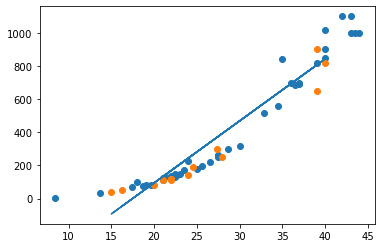

In [685]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
pred = lr.predict(test_input)

plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.plot(test_input, pred)
plt.show()

# 2차 LineRegressor

0.9741759372987736
0.958015265262428
[  0.99532401 -20.60975339]


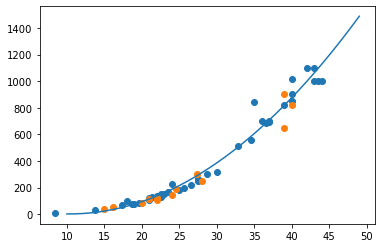

In [686]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
# pred = lr.predict(train_poly)

point = np.arange(10, 50)
print(lr.coef_)

plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_)
plt.show()

# 3차 LineRegressor

0.9755897283184227
0.9556186568674461
[-1.51637933e-02  2.21424131e+00 -5.04710109e+01]


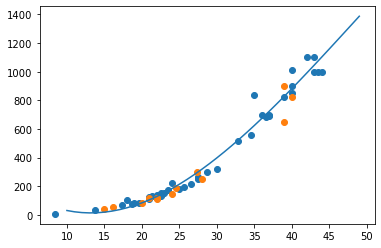

In [687]:
train_poly = np.column_stack((train_input ** 3,train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 3,test_input ** 2, test_input))

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
# pred = lr.predict(train_poly)

point = np.arange(10, 50)
print(lr.coef_)

plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.plot(point, lr.coef_[0]*point**3 + lr.coef_[1]*point**2 + lr.coef_[2]*point + lr.intercept_)
plt.show()

# 다중(3중) 1차 KNN Regressor

In [688]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
# print(perch_full)

train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42)

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))


0.9806793318005479
0.9916579819676246


# 다중(3중) 2차 KNN Regressor

In [689]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

point = np.arange(10, 50)

0.9894085405916164
0.9831744307486032
